In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = "/content/wine_data.csv"  # Replace with actual path
data = pd.read_csv(file_path)


In [ ]:
# Overview of data
print(data.info())
print(data.describe())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Duplicates: {duplicates}")

# Removing duplicates
data = data.drop_duplicates()

# Check for null values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB
None
       fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
count   21000.000000      21000.000000  21000.000

In [ ]:
# Separating features and target
X = data.drop("quality", axis=1)
y = data["quality"]

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


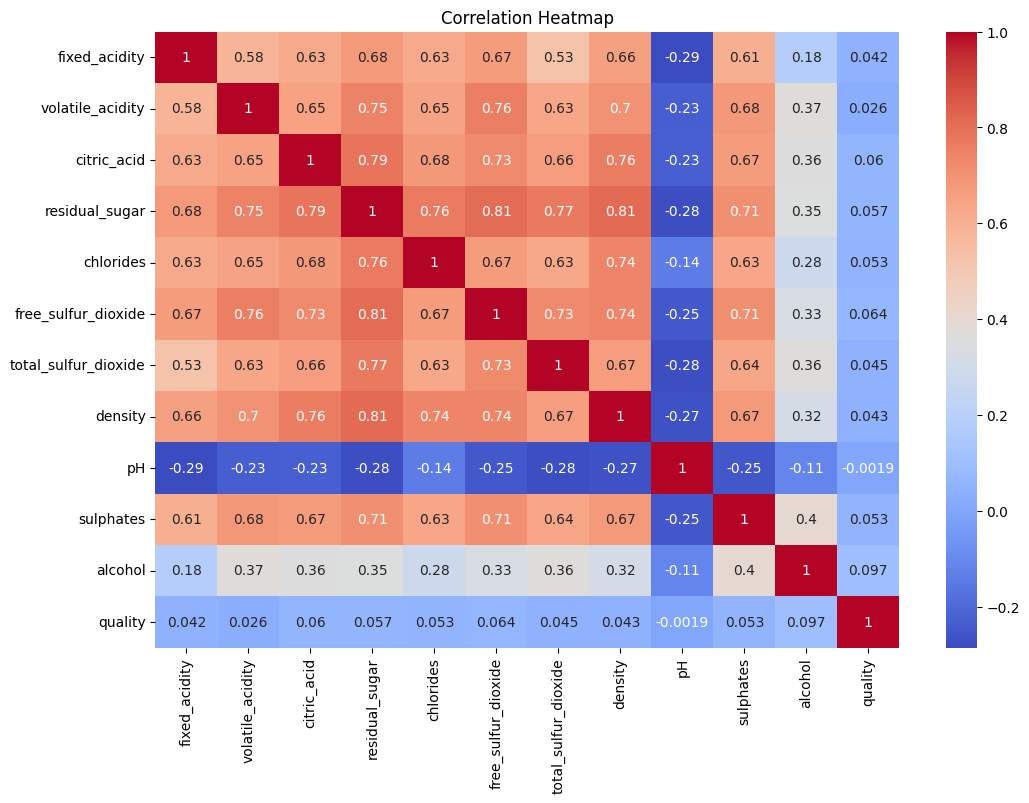

<ipython-input-4-d5e63c1d44c2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="quality", palette="viridis")


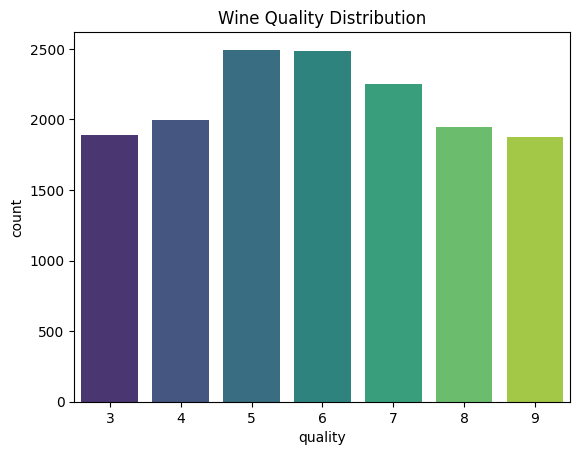

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Target variable distribution
sns.countplot(data=data, x="quality", palette="viridis")
plt.title("Wine Quality Distribution")
plt.show()


In [ ]:
# Select top 5 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_train, y_train)

# Selected features
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['volatile_acidity', 'citric_acid', 'residual_sugar',
       'free_sulfur_dioxide', 'density'],
      dtype='object')


In [ ]:
# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save model
import joblib
joblib.dump(model, "wine_quality_model.pkl")


['wine_quality_model.pkl']

              precision    recall  f1-score   support

           3       0.17      0.24      0.20       566
           4       0.19      0.20      0.19       610
           5       0.62      0.45      0.52       754
           6       0.53      0.64      0.58       733
           7       0.31      0.16      0.21       692
           8       0.17      0.18      0.18       576
           9       0.19      0.23      0.21       551

    accuracy                           0.31      4482
   macro avg       0.31      0.30      0.30      4482
weighted avg       0.33      0.31      0.32      4482



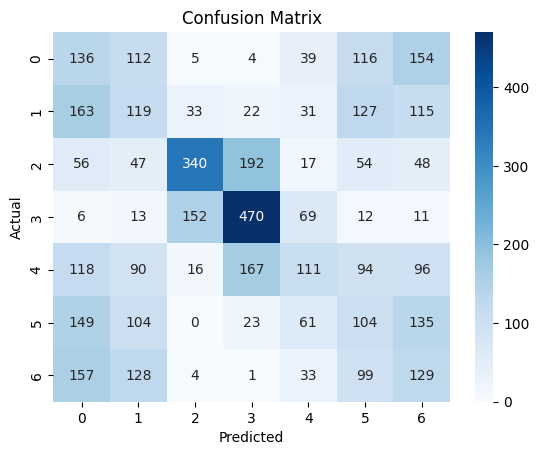

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<ipython-input-8-a6e794f69cba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=feature, palette='coolwarm')
<ipython-input-8-a6e794f69cba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=feature, palette='coolwarm')
<ipython-input-8-a6e794f69cba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='quality', y=feature, palette='coolwarm')
<ipython-input-8-a6e794f69cba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

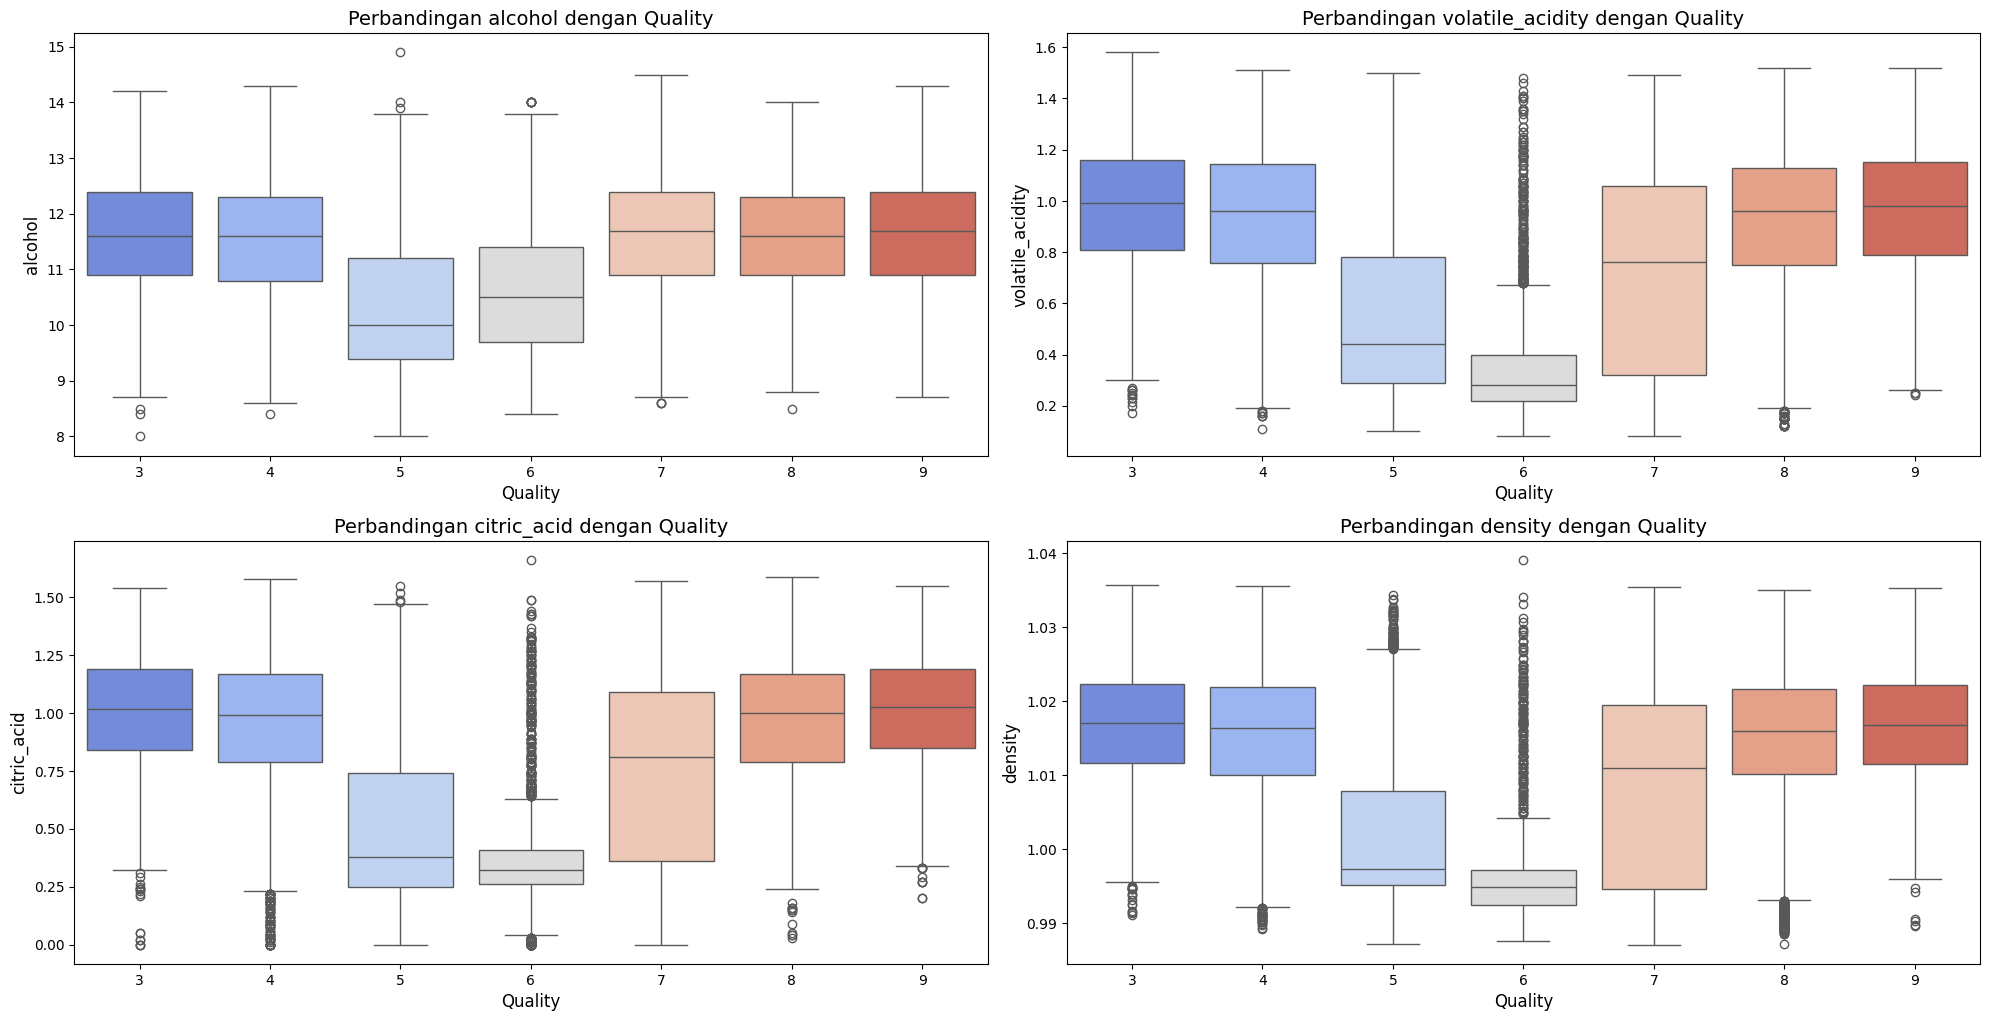

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Membaca dataset
data = pd.read_csv('/content/wine_data.csv')

# Menampilkan grafik perbandingan kualitas wine dengan zat kimia
chemical_features = [
    'alcohol', 'volatile_acidity', 'citric_acid', 'density'
]

# Ukuran keseluruhan plot
plt.figure(figsize=(20, 20))

# Membuat subplot untuk setiap fitur
for i, feature in enumerate(chemical_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=data, x='quality', y=feature, palette='coolwarm')
    plt.title(f'Perbandingan {feature} dengan Quality', fontsize=14)
    plt.xlabel('Quality', fontsize=12)
    plt.ylabel(feature, fontsize=12)

# Menyesuaikan layout
plt.tight_layout()
plt.show()


Confusion Matrix:
[[391  61   5   2  13  64  64]
 [ 77 372  20  11  13  45  62]
 [ 36  28 351 123   9  25  28]
 [  8   7  73 467  33   9   3]
 [ 55  52   5 115 277  42  54]
 [ 76  62   2  16  21 360  63]
 [ 78  64   0   0  18  54 386]]

Classification Report:
              precision    recall  f1-score   support

           3       0.54      0.65      0.59       600
           4       0.58      0.62      0.60       600
           5       0.77      0.58      0.66       600
           6       0.64      0.78      0.70       600
           7       0.72      0.46      0.56       600
           8       0.60      0.60      0.60       600
           9       0.58      0.64      0.61       600

    accuracy                           0.62      4200
   macro avg       0.63      0.62      0.62      4200
weighted avg       0.63      0.62      0.62      4200


Accuracy Score: 0.62

Feature Importances:
                 Feature  Importance
7                density    0.113996
3         residual_sugar 

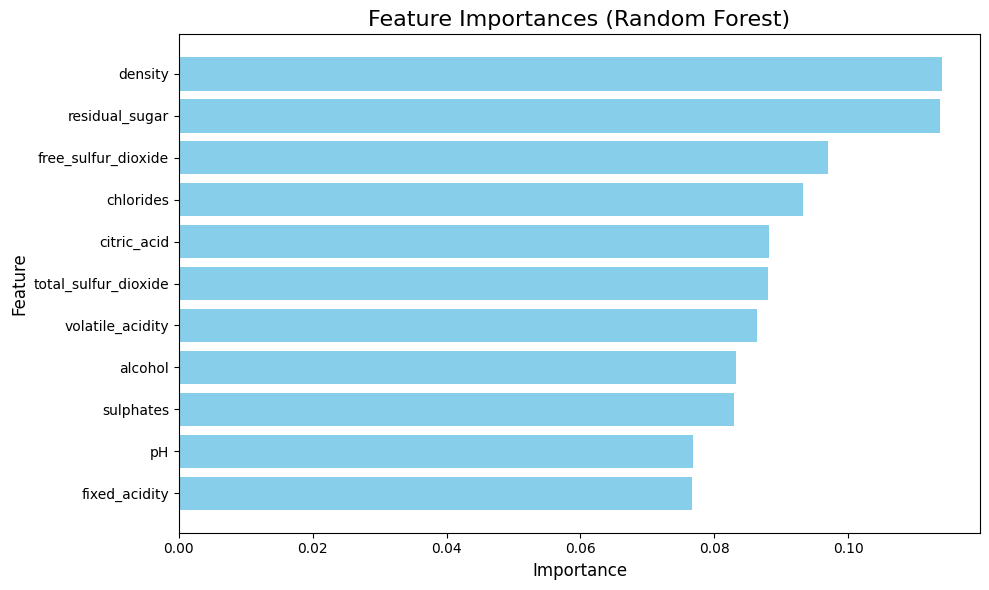

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Membaca dataset
data = pd.read_csv('/content/wine_data.csv')

# Memisahkan fitur dan target
X = data.drop('quality', axis=1)  # Fitur
y = data['quality']              # Target

# Preprocessing: Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Menampilkan fitur penting (feature importance)
feature_importance = pd.DataFrame({
    'Feature': data.columns[:-1],
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance)

# Visualisasi fitur penting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importances (Random Forest)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()
